In [32]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from visual import setting

setting.set_rc_params()

{'axes.linewidth': 1.5,
 'axes.unicode_minus': False,
 'figure.dpi': 300,
 'font.size': 20,
 'legend.frameon': True,
 'legend.handletextpad': 0.4,
 'legend.handlelength': 1,
 'legend.facecolor': 'white',
 'legend.fancybox': True,
 'legend.fontsize': 12,
 'mathtext.default': 'regular',
 'savefig.bbox': 'tight',
 'xtick.labelsize': 12,
 'ytick.labelsize': 12,
 'xtick.major.size': 6,
 'ytick.major.size': 6,
 'xtick.major.width': 1,
 'ytick.major.width': 1,
 'xtick.top': True,
 'ytick.right': True,
 'axes.edgecolor': 'black',
 'savefig.facecolor': 'white',
 'axes.facecolor': 'whitesmoke',
 'font.family': 'sans',
 'font.monospace': 'computer modern roman',
 'text.usetex': True,
 'axes.grid': True,
 'grid.color': 'gray',
 'grid.linestyle': '-',
 'grid.linewidth': 0.2,
 'grid.alpha': 0.3,
 'axes.axisbelow': 'line'}

First we'll get the UCDP Data, you can use the API to get it.

It takes a minimal amount of adjusting to get battledeaths oriented data. One important thing to do is to remove duplicate conflict years which are catloged for different aspects of the conflict in a given year.

In [14]:
# Endpoints
page0 = 'https://ucdpapi.pcr.uu.se/api/battledeaths/22.1?pagesize=1000&page=0'
page1 = 'https://ucdpapi.pcr.uu.se/api/battledeaths/22.1?pagesize=1000&page=1'

data_pages = []
for i in [page0, page1]:
  response = requests.get(i)
  data_pages.append(pd.DataFrame(response.json()['Result']))

conflict_data = pd.concat(data_pages)
conflict_data.columns

bd_deaths = conflict_data.drop_duplicates(subset=['conflict_id', 'year'])
bd_deaths.bd_best = bd_deaths.bd_best.astype(int)
bd_deaths.year = bd_deaths.year.astype(int)



/opt/anaconda3/envs/pyold/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
bd_deaths.describe()
bd_deaths['deaths'] = bd_deaths.bd_best


/opt/anaconda3/envs/pyold/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
bd_deaths['country'] = bd_deaths['side_a']

/opt/anaconda3/envs/pyold/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


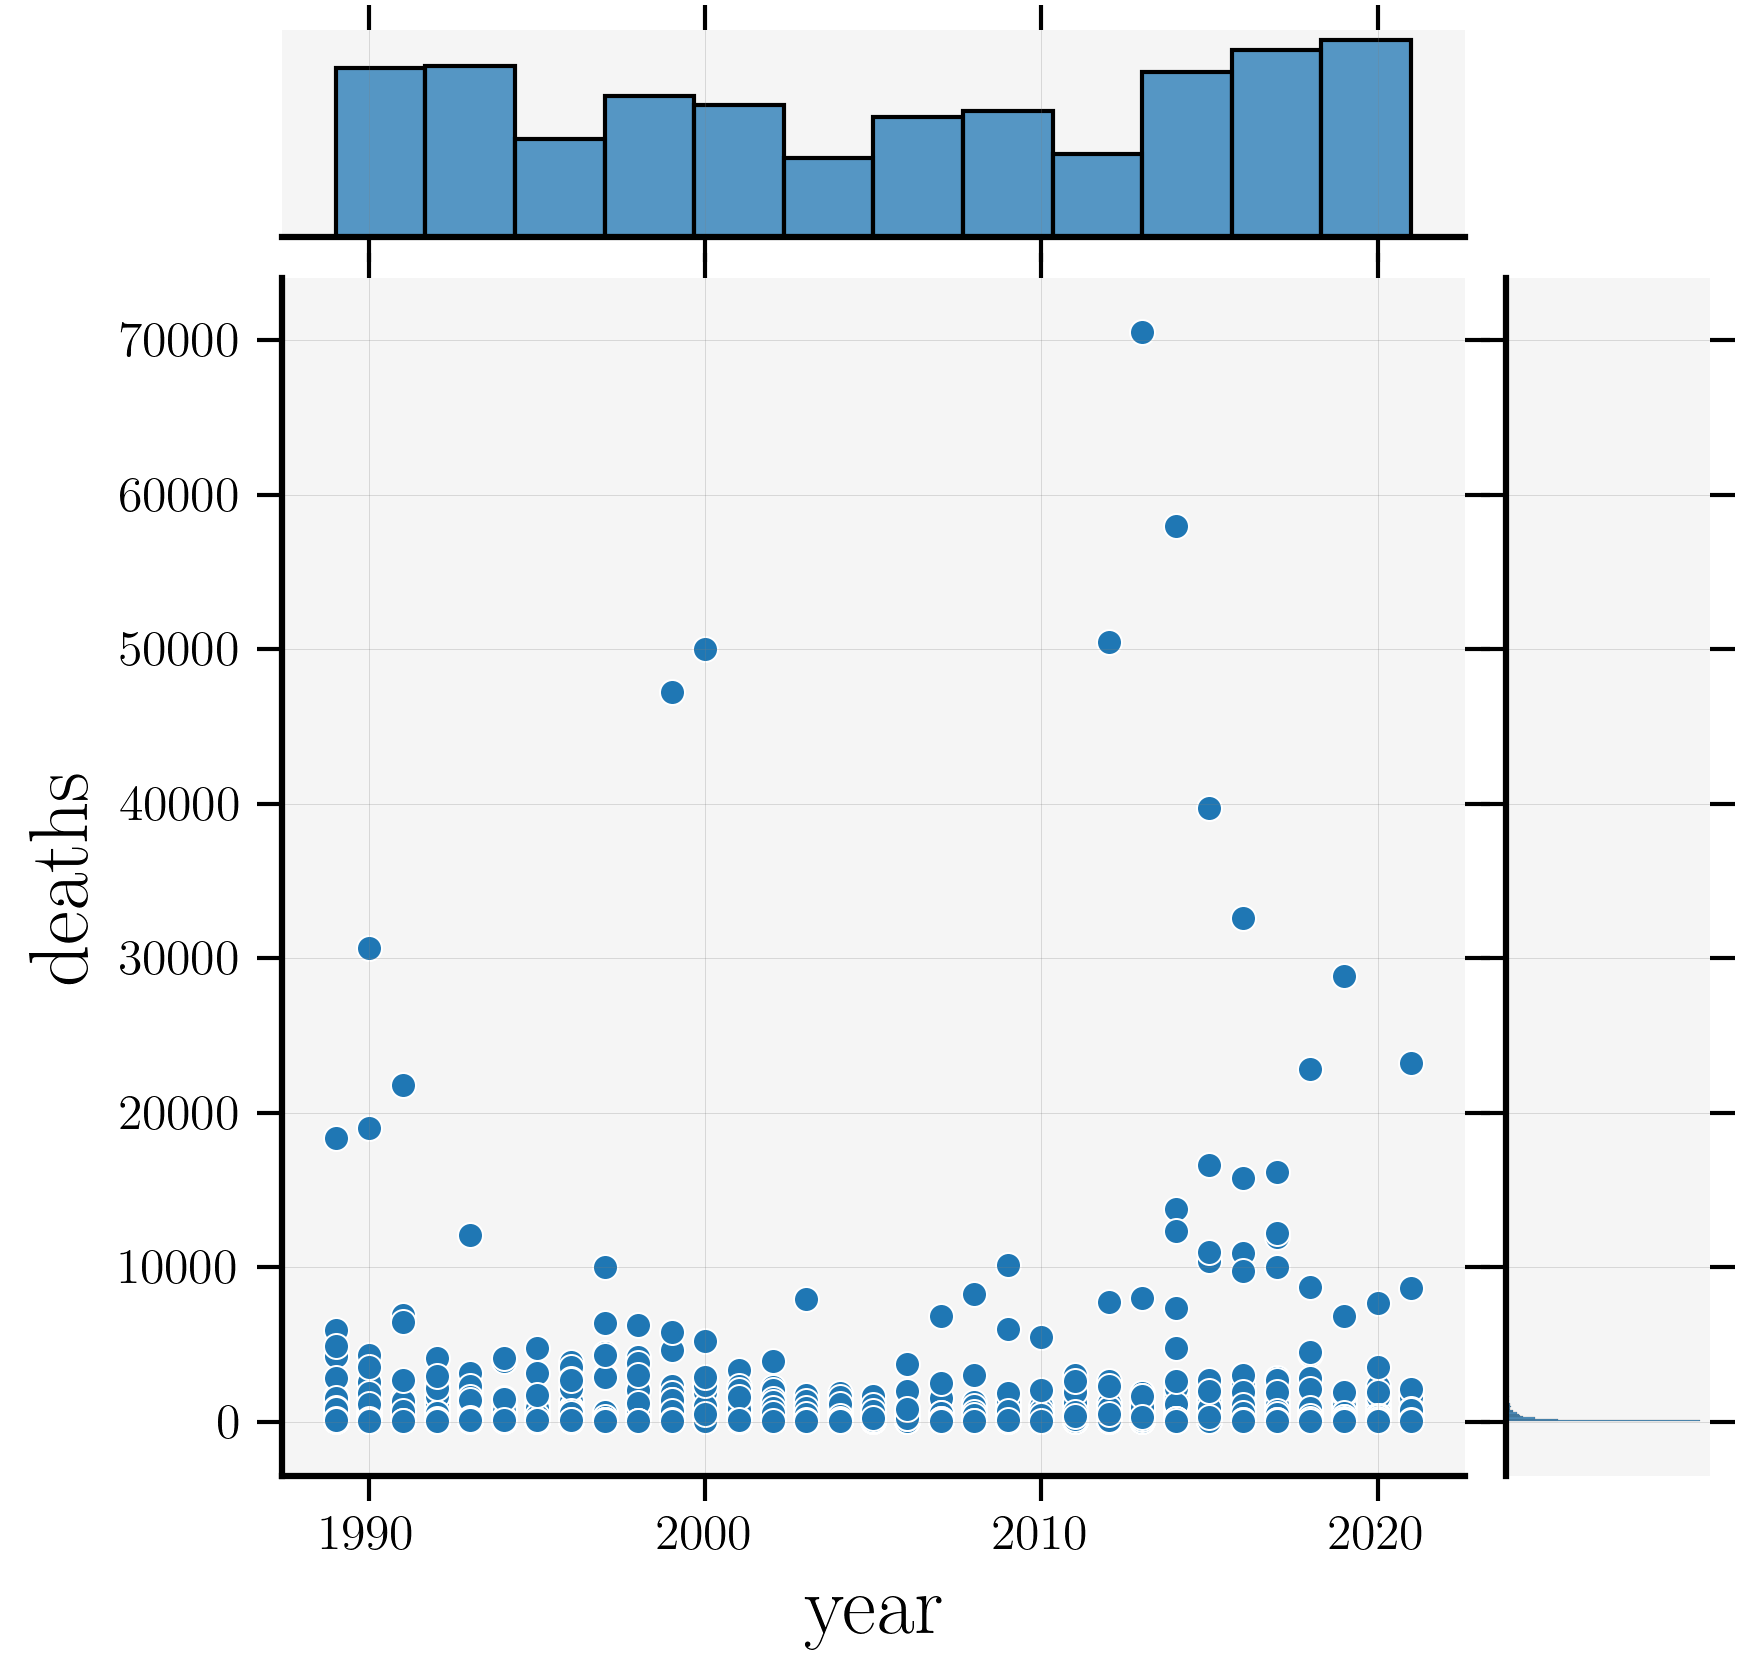

In [39]:

sns.jointplot(x='year', y='deaths',data=bd_deaths, )

#g = sns.JointGrid(x='year', y='deaths', data=bd_deaths, hue = 'country')

#g.plot(sns.scatterplot, sns.histplot)
#bd_deaths.plot(kind='scatter', x='year', y='deaths')

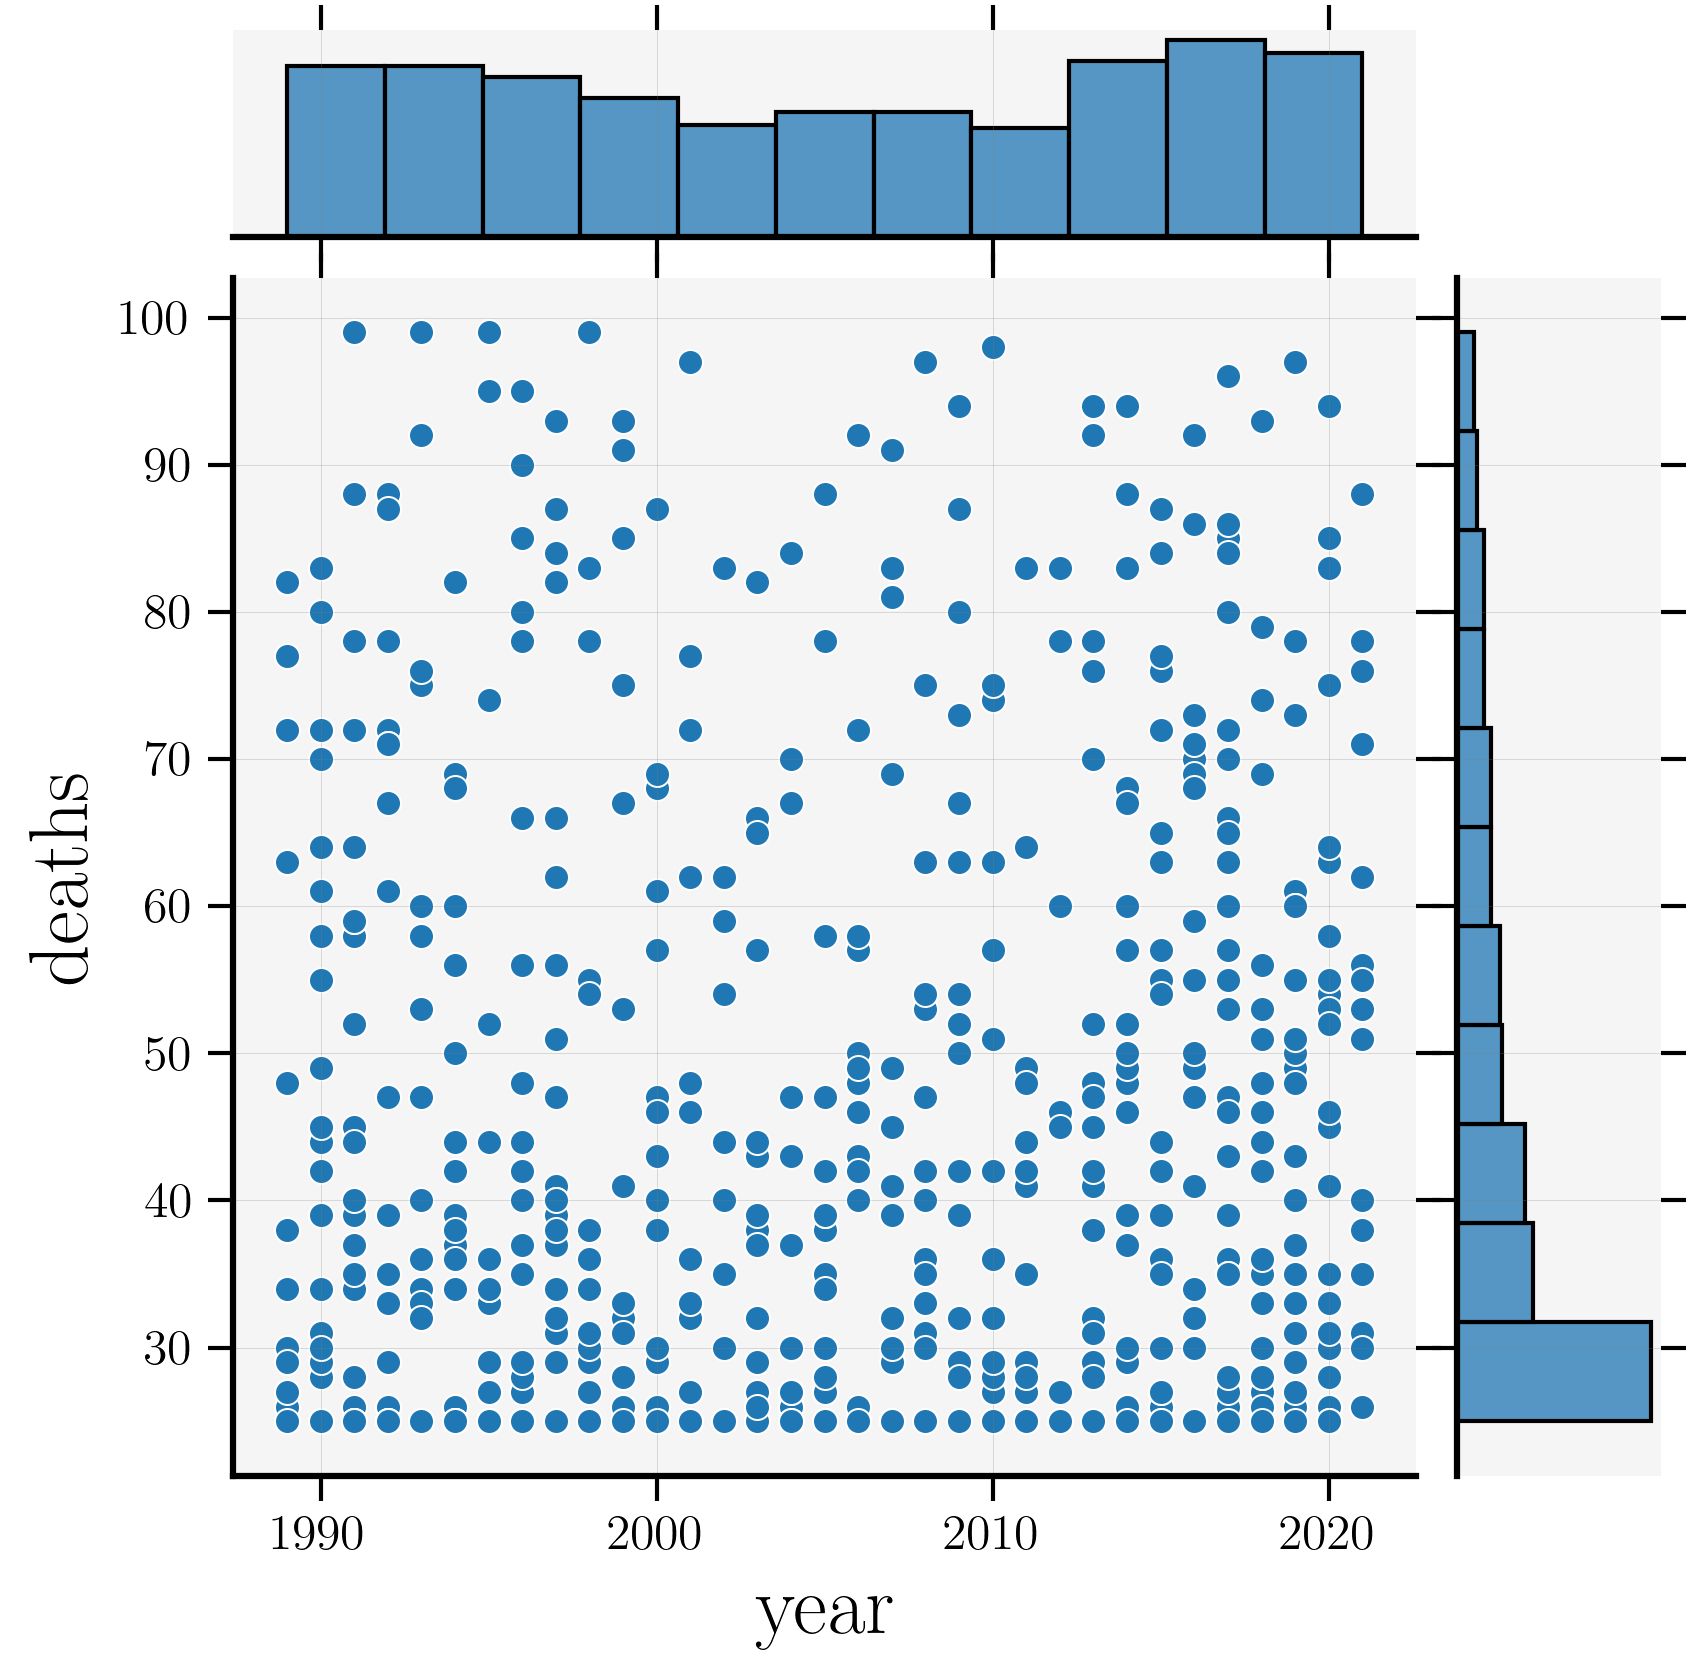

In [40]:
sns.jointplot(x='year', y='deaths', data=bd_deaths.loc[bd_deaths.deaths < 100])


In [41]:
bd_deaths.columns

Index(['conflict_id', 'dyad_id', 'location_inc', 'side_a', 'side_a_id',
       'side_a_2nd', 'side_b', 'side_b_Id', 'side_b_2nd', 'incompatibility',
       'territory_name', 'year', 'bd_best', 'bd_low', 'bd_high',
       'type_of_conflict', 'battle_location', 'gwno_a', 'gwno_a_2nd', 'gwno_b',
       'gwno_b_2nd', 'gwno_loc', 'gwno_battle', 'region', 'version', 'deaths',
       'country'],
      dtype='object')

In [42]:
bd_deaths.groupby(['conflict_id', 'side_a'])['bd_best'].sum().nlargest(20)

conflict_id  side_a                             
299          Government of Syria                    284317
333          Government of Afghanistan              170193
409          Government of Eritrea                   98217
352          Government of Sri Lanka                 60674
259          Government of Iraq                      58483
13604        Government of Syria                     48589
267          Government of Ethiopia                  48180
275          Government of Ethiopia                  43470
230          Government of Yemen (North Yemen)       42452
309          Government of Sudan                     36391
354          Government of Turkey                    32952
327          Government of Angola                    30227
337          Government of Somalia                   29505
404          Government of Pakistan                  28134
371          Government of Iraq                      22848
364          Government of India                     18988
401    

# Commercial Military Actors Dataset

In [43]:
cmad = pd.read_excel('data/cma_data/Petersohn_et.al_CMA_Dataset_Version2.xlsx')

/opt/anaconda3/envs/pyold/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [44]:
cmad

,EchangeID,COWState,COWCCode,YEAR,Region,CMA,ExTCode,Clnt,SpCl,ClNa,...,AgSt,OwSt,SizeBest,SizeMin,SizeMax,Rly,Note: size,Note: contracting/ Client,Note: Task,Note: other
0,HAI20091,HAI,41,2009,6,1,NaN,4,7,United Nations,...,3,2,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1,HAI20101,HAI,41,2010,6,1,NaN,4,6,European Union,...,3,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
2,HAI20111,HAI,41,2011,6,1,NaN,4,6,European Union,...,3,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
3,HAI20141,HAI,41,2014,6,1,NaN,4,7,United Nations,...,3,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
4,HAI20092,HAI,41,2009,6,1,NaN,4,7,United Nations,...,2,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7088,ANG199727,ANG,540,1997,4,1,NaN,999,999,NaN,...,3,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
7089,ANG199629,ANG,540,1996,4,1,NaN,999,999,NaN,...,3,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
7090,ANG199728,ANG,540,1997,4,1,NaN,999,999,NaN,...,3,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
7091,IRQ2005104,IRQ,645,2005,2,1,NaN,5,1,ITA,...,3,1,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN


In [45]:
cmad.describe()

,COWCCode,YEAR,Region,CMA,Clnt,SpCl,ForT,CoOrR,OpOrR,Serv,AgSt,OwSt,SizeBest,SizeMin,SizeMax,Rly
count,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.00000,7092.000000,7088.000000,7093.000000,7093.000000,724.000000,821.000000,816.000000,7093.000000
mean,498.081771,2005.513182,3.832934,1.000846,216.975892,569.869731,215.490907,137.08304,701.954315,119.160130,8.463979,165.869026,604.096685,896.013398,1109.528186,1.492316
std,213.964948,7.621030,1.253367,0.029074,407.418725,493.175686,410.757015,339.31478,455.244851,315.403506,76.457207,370.239303,2440.621906,3104.629675,3878.459099,0.814494
min,41.000000,1980.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,451.000000,2002.000000,3.000000,1.000000,4.000000,2.000000,0.000000,2.00000,7.000000,5.000000,2.000000,1.000000,6.750000,9.000000,10.000000,1.000000
50%,540.000000,2007.000000,4.000000,1.000000,5.000000,998.000000,0.000000,4.00000,999.000000,7.000000,3.000000,1.000000,50.000000,58.000000,94.500000,1.000000
75%,645.000000,2011.000000,4.000000,1.000000,9.000000,999.000000,1.000000,5.00000,999.000000,7.000000,3.000000,2.000000,400.000000,365.000000,500.000000,2.000000
max,910.000000,2016.000000,6.000000,2.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,30000.000000,30000.000000,53200.000000,3.000000


In [55]:
cmad['ContractCount'] = 1
cyear = cmad.loc[cmad.Serv <=10].groupby(['YEAR', 'COWCCode', 'COWState'])['ContractCount'].sum().reset_index()
cyear['CompanyPresence'] = 1

<AxesSubplot:xlabel='YEAR'>

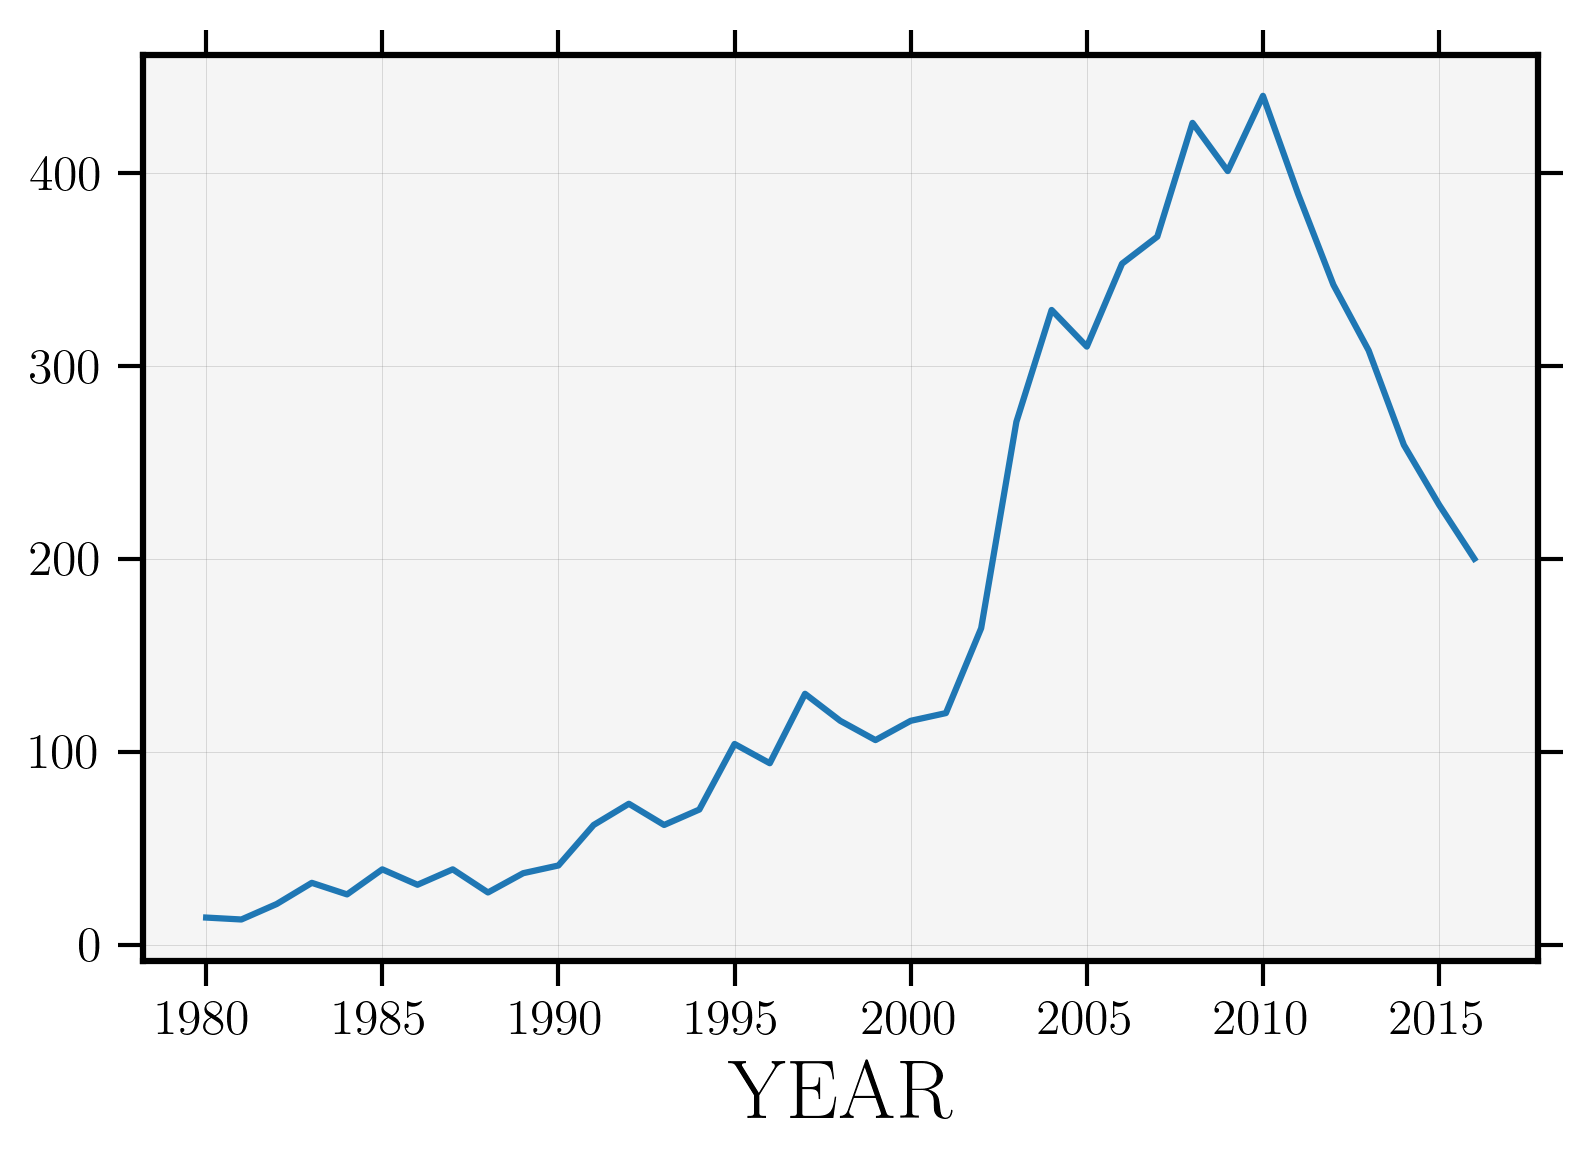

In [57]:
cyear.groupby('YEAR')['ContractCount'].sum().plot()

<AxesSubplot:xlabel='YEAR'>

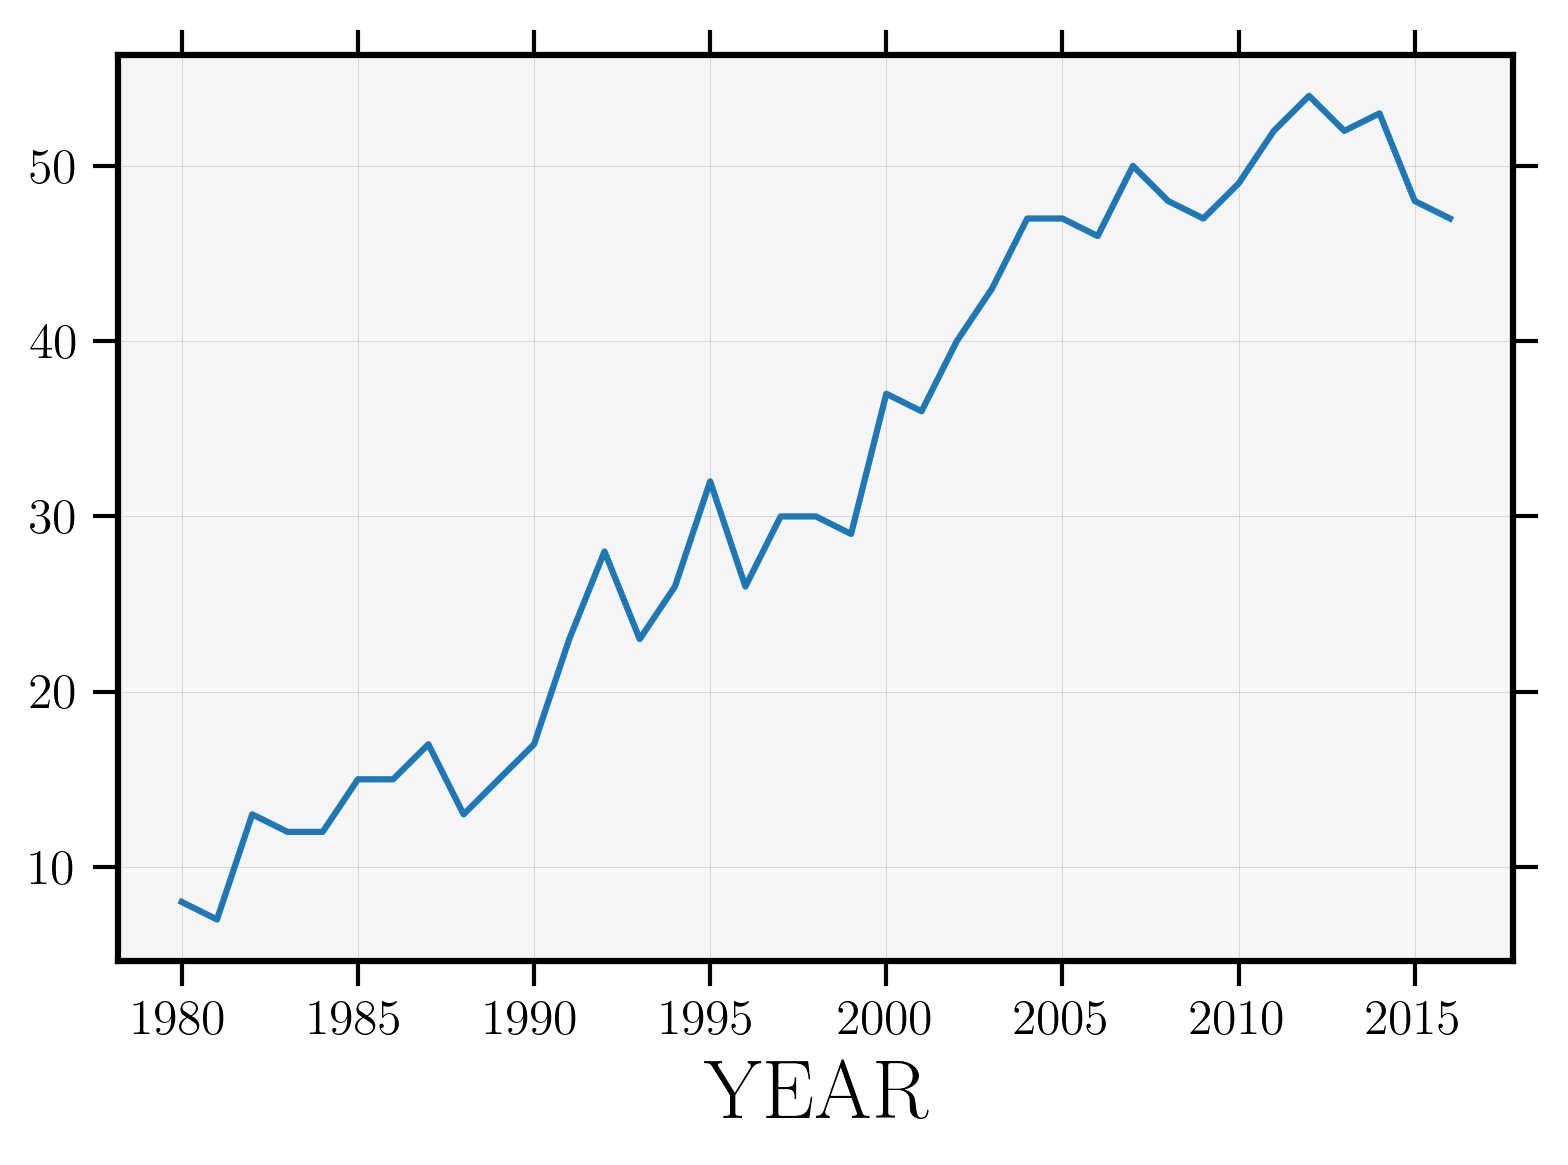

In [60]:
cyear.groupby('YEAR')['CompanyPresence'].sum().plot()

In [61]:
cyear

,YEAR,COWCCode,COWState,ContractCount,CompanyPresence
0,1980,70,MEX,1,1
1,1980,92,SAL,6,1
2,1980,530,ETH,1,1
3,1980,540,ANG,2,1
4,1980,645,IRQ,1,1
...,...,...,...,...,...
1182,2016,780,SRI,1,1
1183,2016,790,NEP,1,1
1184,2016,820,MAL,2,1
1185,2016,840,PHI,1,1


In [67]:
bd_deaths.head()

,conflict_id,dyad_id,location_inc,side_a,side_a_id,side_a_2nd,side_b,side_b_Id,side_b_2nd,incompatibility,...,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,gwno_battle,region,version,deaths,country
0,11342,11971,India,Government of India,141,,GNLA,1163,,1,...,750,,,,750,750,3,22.1,27,Government of India
1,11342,11971,India,Government of India,141,,GNLA,1163,,1,...,750,,,,750,750,3,22.1,26,Government of India
2,11344,11977,Sudan,Government of Sudan,112,,Republic of South Sudan,1129,,1,...,625,,,,625,625,4,22.1,145,Government of Sudan
3,11345,11978,South Sudan,Government of South Sudan,113,,SSDM/A,1108,,2,...,626,,,,626,626,4,22.1,105,Government of South Sudan
5,11345,11979,South Sudan,Government of South Sudan,113,,SSLM/A,1124,,2,...,626,,,,626,626,4,22.1,137,Government of South Sudan


In [111]:
cyear['YEAR'] = cyear['YEAR'].astype(int)
bd_deaths['year'] = bd_deaths['year'].astype(int)
cyear['COWCCode'] = cyear['COWCCode'].astype(int)
bd_deaths.gwno_a = bd_deaths.gwno_a.str.replace('900, 200, 2', '900')
bd_deaths['gwno_a'] = bd_deaths['gwno_a'].astype(int)

cmad_merged = bd_deaths.merge(cyear, left_on=['gwno_a', 'year'], right_on=['COWCCode', 'YEAR'], how='left')
cmad_merged['CompanyPresence'] = cmad_merged['CompanyPresence'].fillna(0)
cmad_merged['ContractCount'] = cmad_merged['ContractCount'].fillna(0)

/opt/anaconda3/envs/pyold/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/pyold/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [96]:

cmad_merged.groupby(['conflict_id', 'side_a'])[['bd_best', 'CompanyPresence', 'ContractCount']].sum().nlargest(20, 'bd_best')

,,bd_best,CompanyPresence,ContractCount
conflict_id,side_a,,,
299,Government of Syria,284317,6.0,22.0
333,Government of Afghanistan,170193,21.0,766.0
409,Government of Eritrea,98217,0.0,0.0
352,Government of Sri Lanka,60674,6.0,7.0
259,Government of Iraq,58483,14.0,829.0
13604,Government of Syria,48589,4.0,17.0
267,Government of Ethiopia,48180,0.0,0.0
275,Government of Ethiopia,43470,0.0,0.0
230,Government of Yemen (North Yemen),42452,0.0,0.0


In [97]:
cmad_merged.groupby(['conflict_id', 'side_a'])[['bd_best', 'CompanyPresence', 'ContractCount']].sum().nsmallest(50, 'bd_best')

,,bd_best,CompanyPresence,ContractCount
conflict_id,side_a,,,
15183,Government of Tanzania,25,0.0,0.0
274,Government of China,25,0.0,0.0
363,Government of Ethiopia,25,0.0,0.0
434,Government of India,25,1.0,10.0
13721,Government of Algeria,26,1.0,2.0
14268,Government of Iran,27,0.0,0.0
14935,Government of Ethiopia,27,0.0,0.0
15283,Government of Central African Republic,27,0.0,0.0
294,Government of Cambodia (Kampuchea),29,0.0,0.0


In [98]:
corr = cmad_merged['bd_best'].corr(cmad_merged['CompanyPresence'])
corr


0.024888196980152936

In [99]:
corr = cmad_merged['bd_best'].corr(cmad_merged['ContractCount'])
corr

0.047557068708236054

<AxesSubplot:xlabel='ContractCount', ylabel='deaths'>

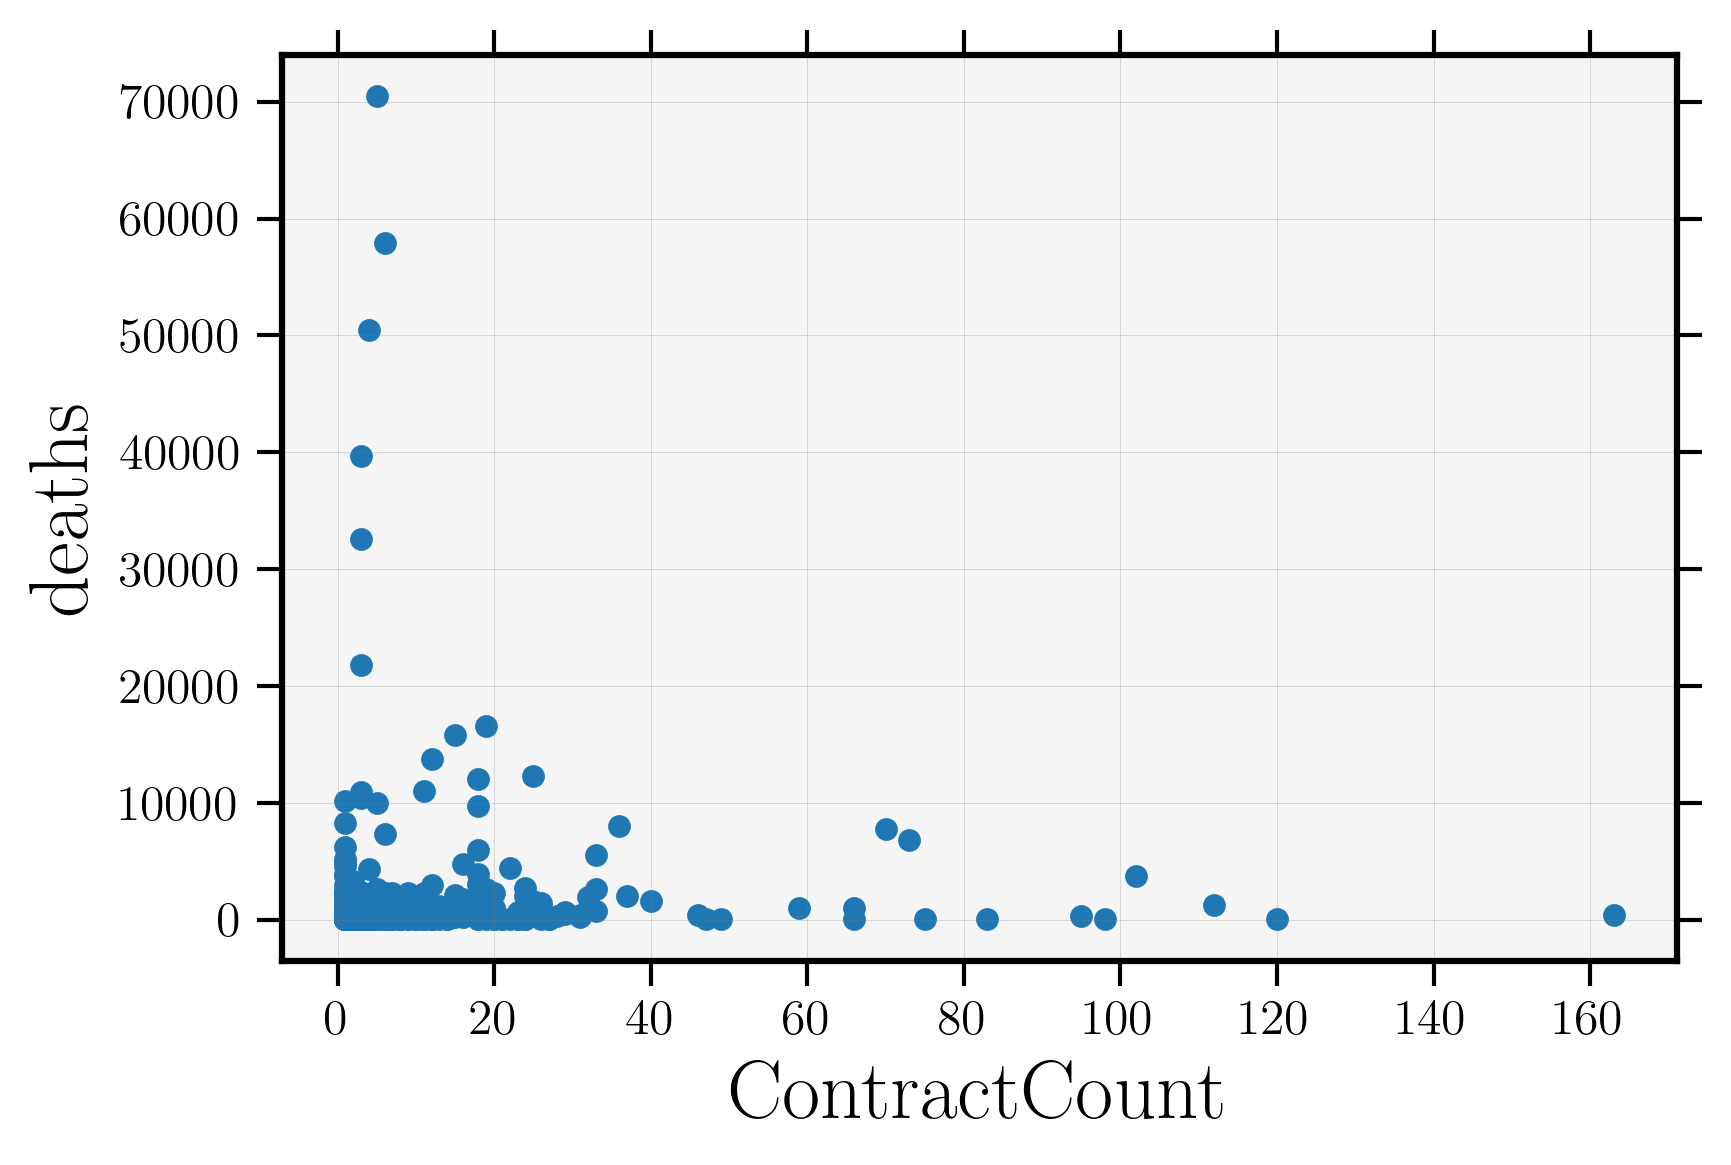

In [100]:
cmad_merged[['deaths', 'ContractCount']].plot(kind='scatter', x='ContractCount', y='deaths')

<AxesSubplot:xlabel='CompanyPresence', ylabel='deaths'>

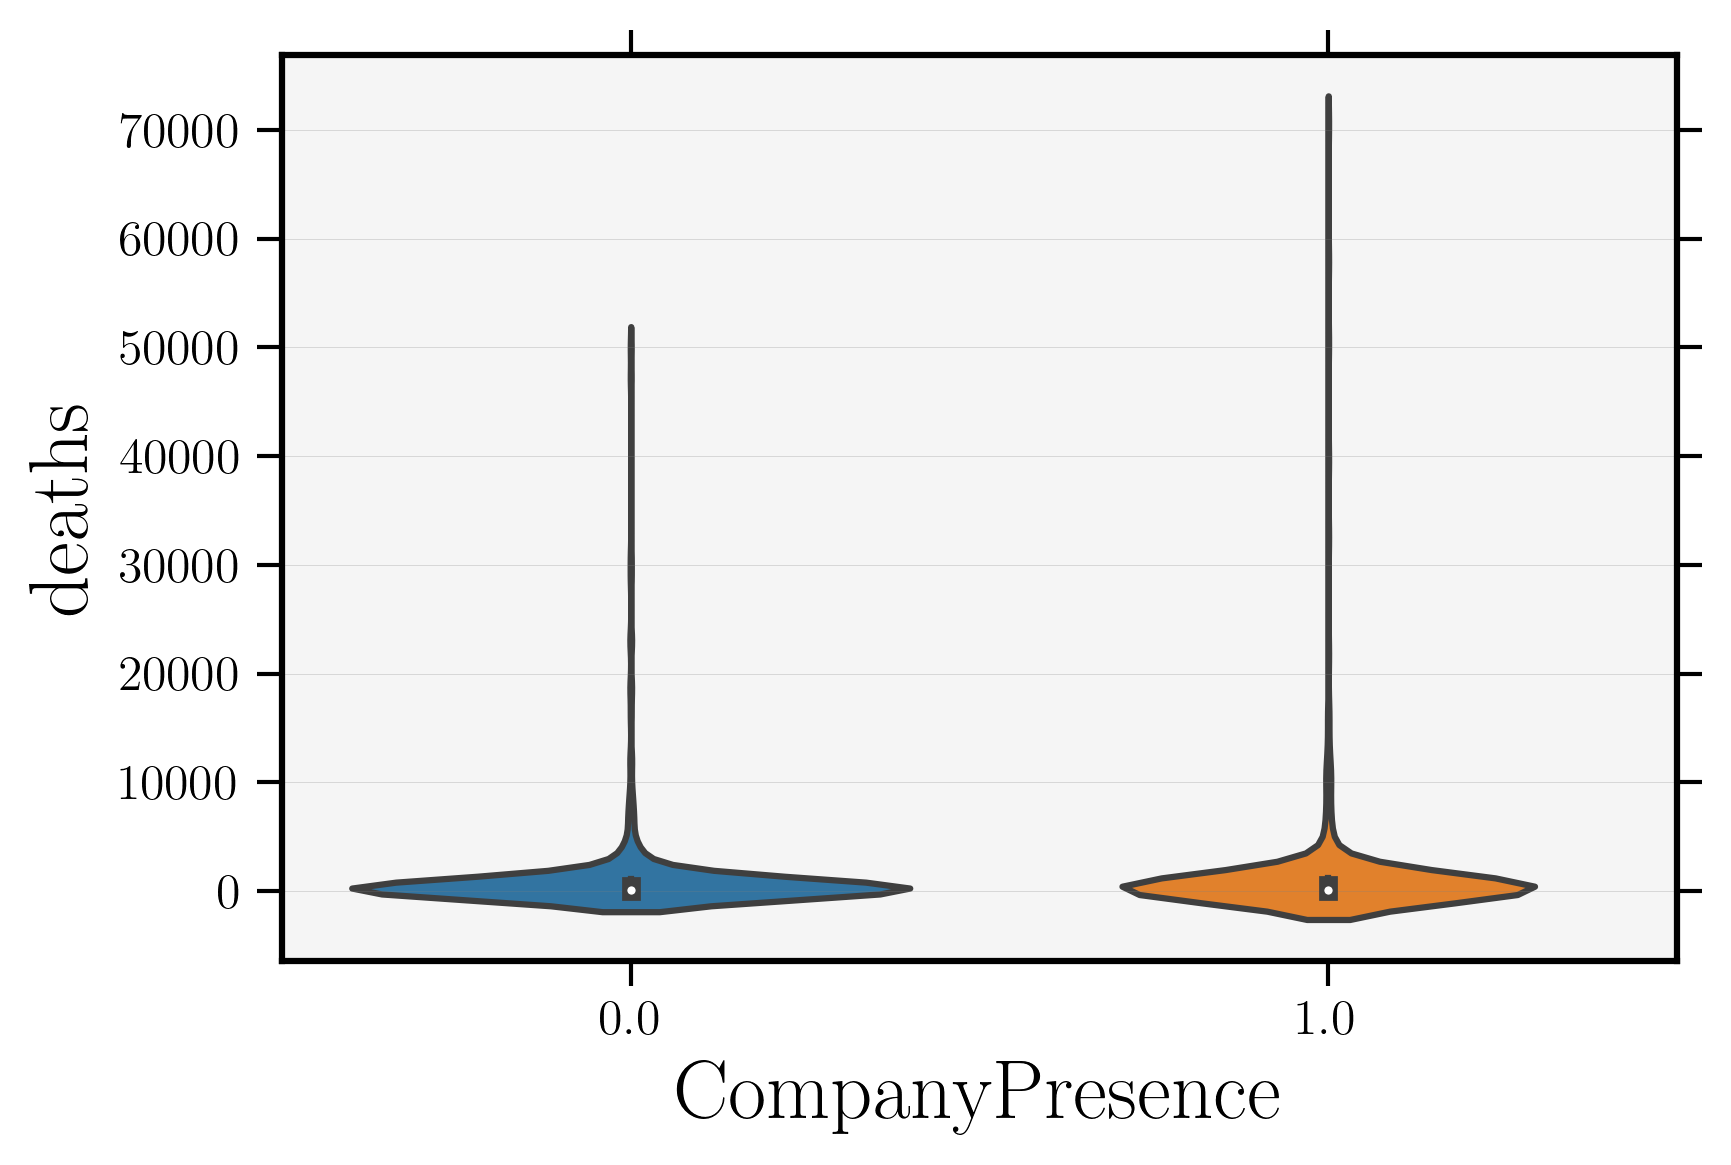

In [101]:
sns.violinplot(x='CompanyPresence', y='deaths', data=cmad_merged)


<AxesSubplot:xlabel='CompanyPresence', ylabel='deaths'>

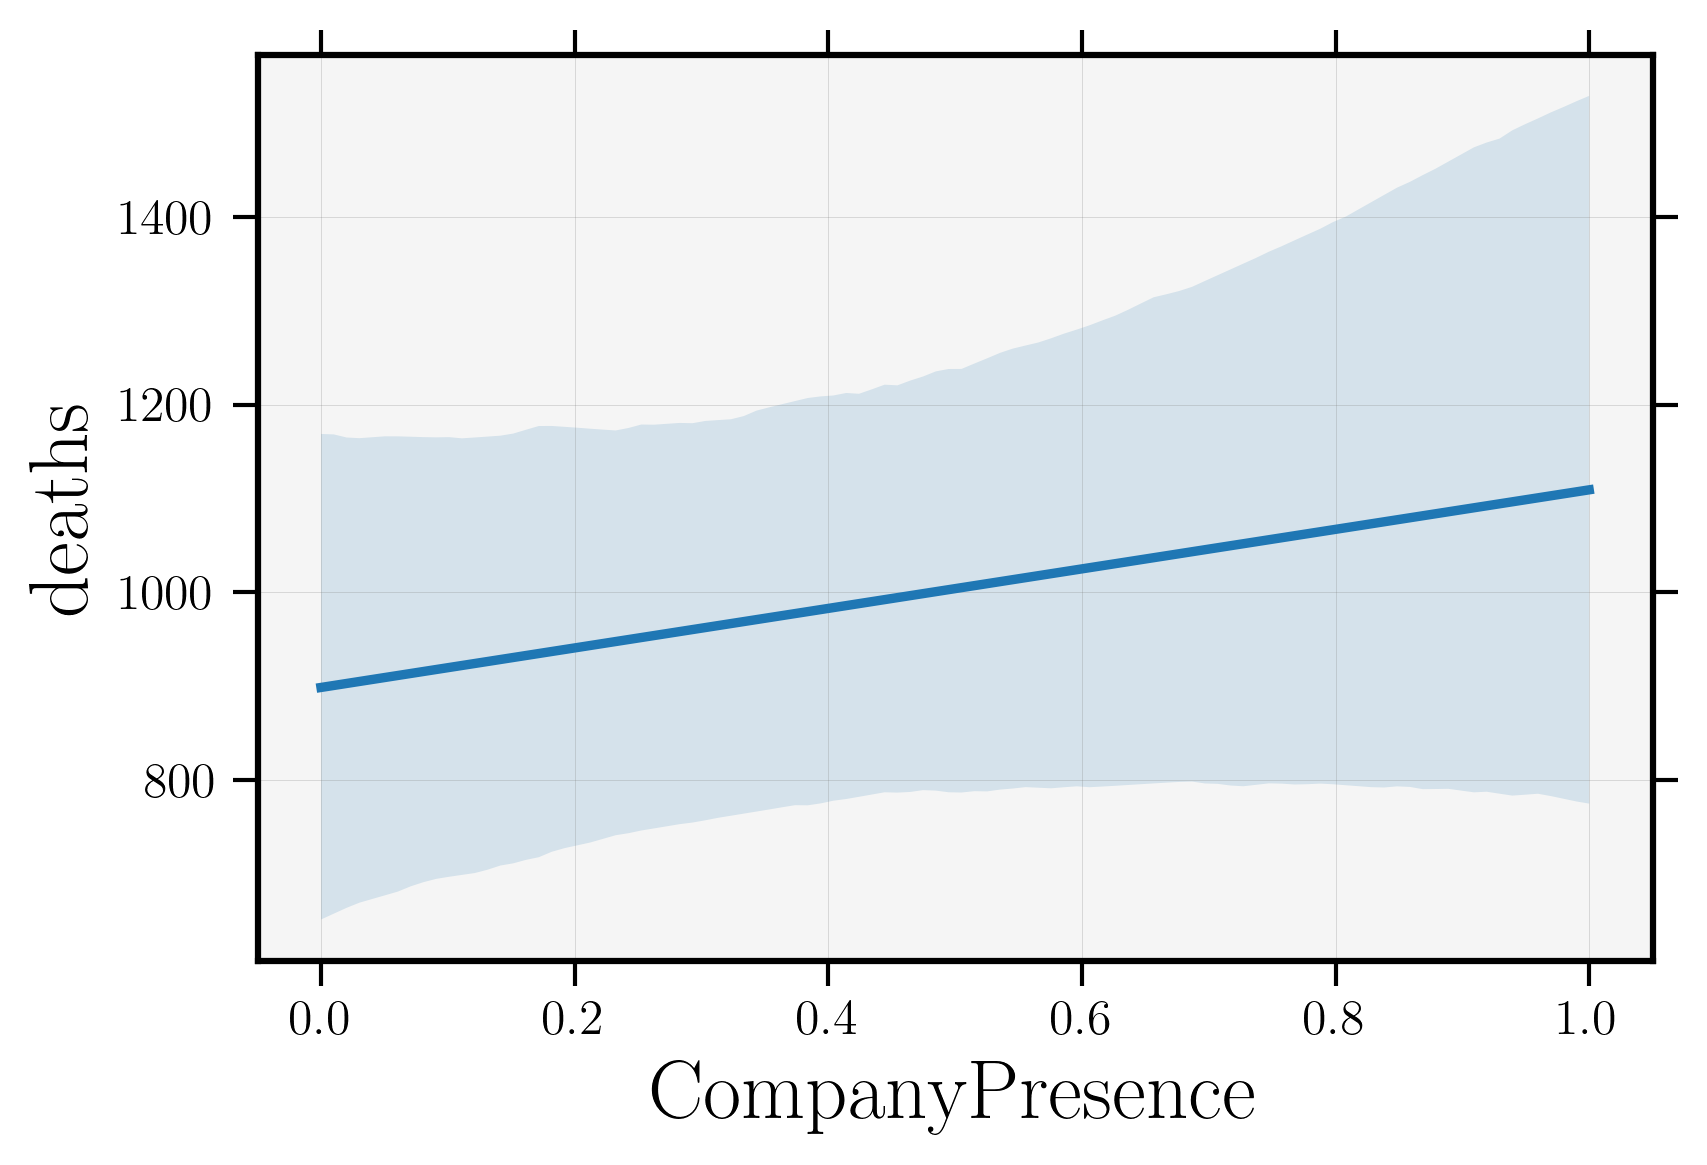

In [102]:
sns.regplot(x='CompanyPresence', y='deaths', data=cmad_merged, scatter=False)

<AxesSubplot:xlabel='ContractCount', ylabel='deaths'>

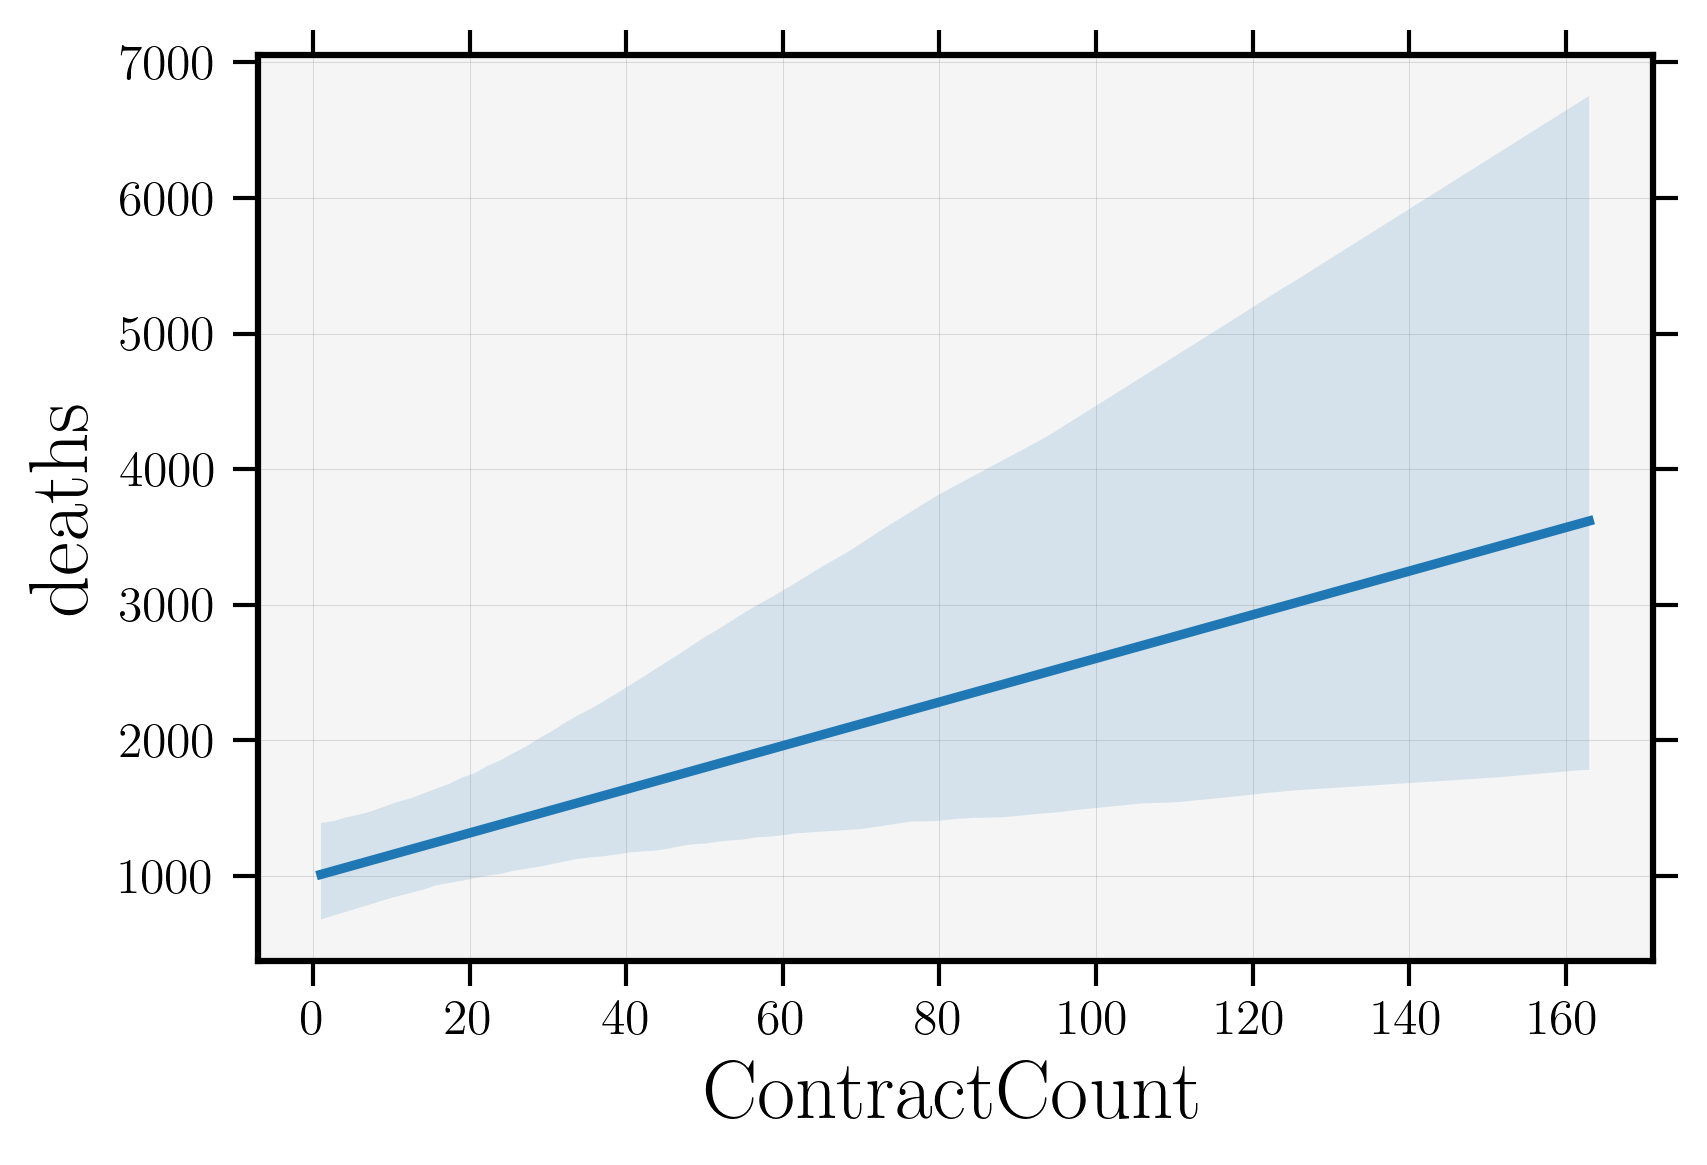

In [103]:

sns.regplot(x='ContractCount', y='deaths', data=cmad_merged, scatter=False)

<AxesSubplot:xlabel='ContractCount', ylabel='deaths'>

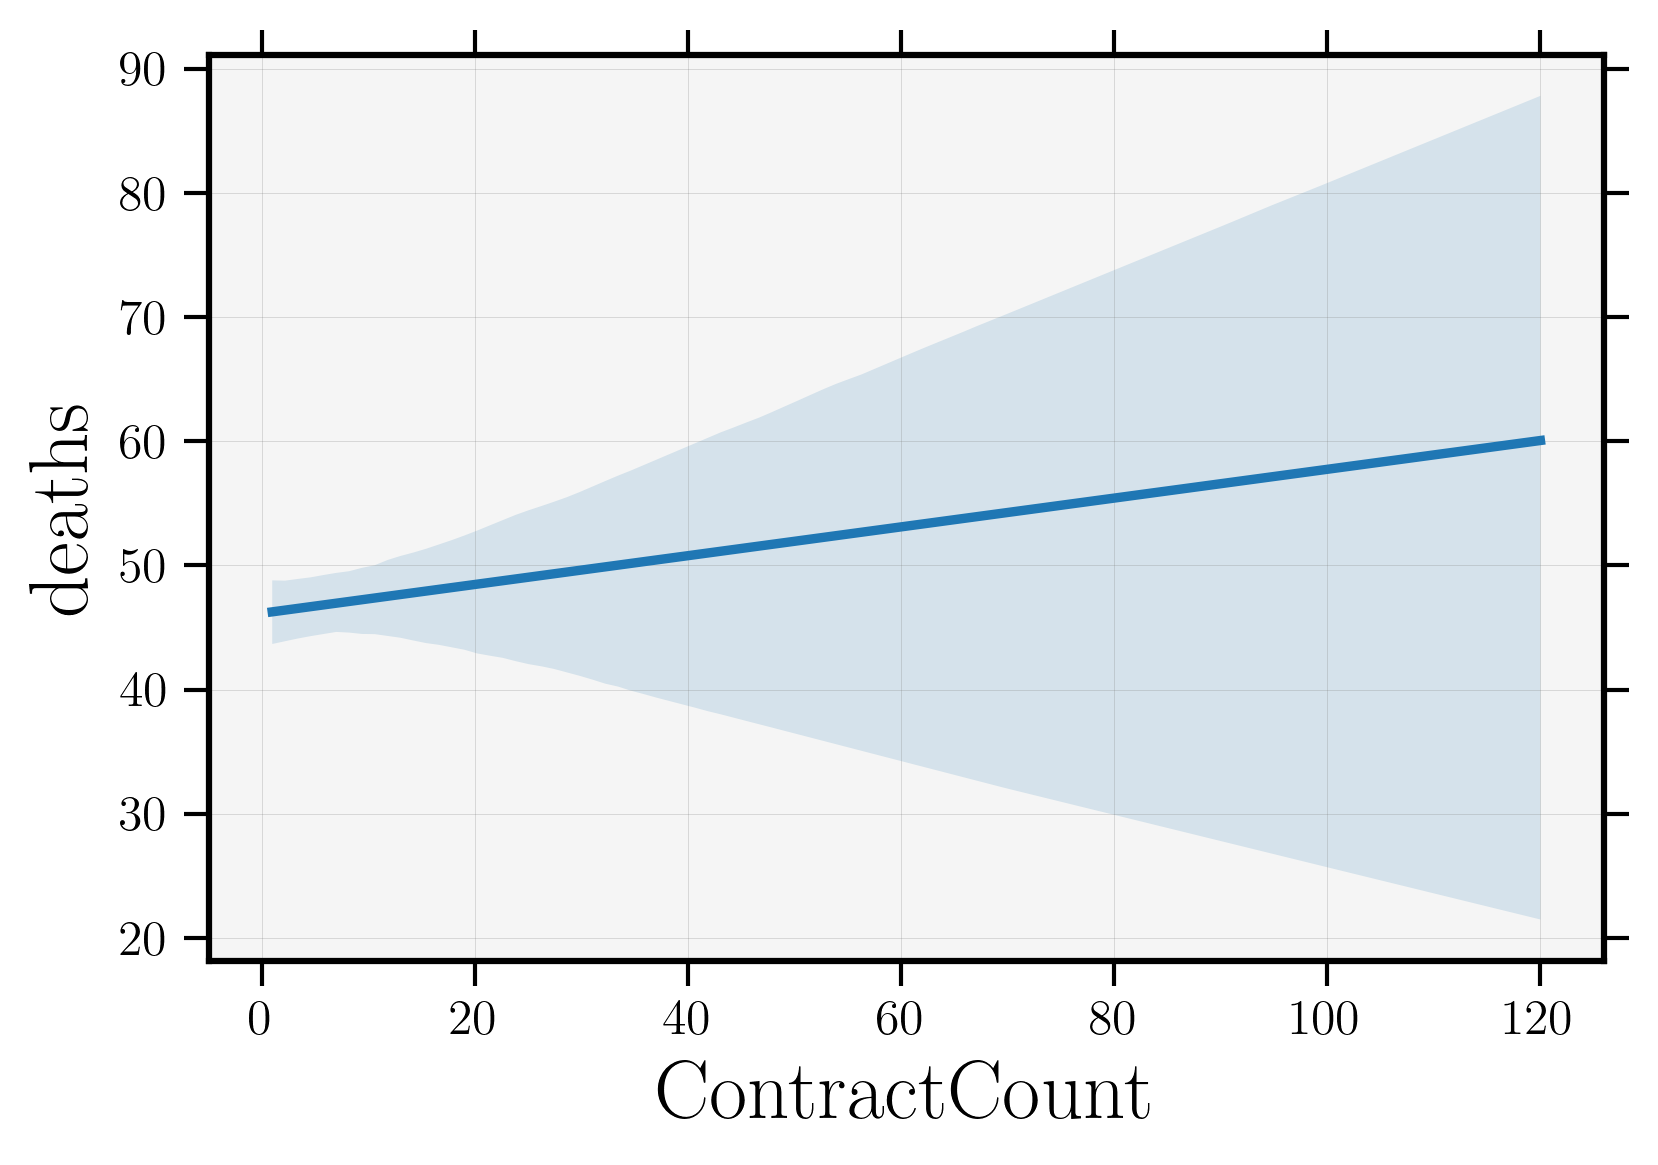

In [104]:
sns.regplot(x='ContractCount', y='deaths', data=cmad_merged.loc[cmad_merged.deaths<100], scatter=False)

<AxesSubplot:xlabel='ContractCount', ylabel='deaths'>

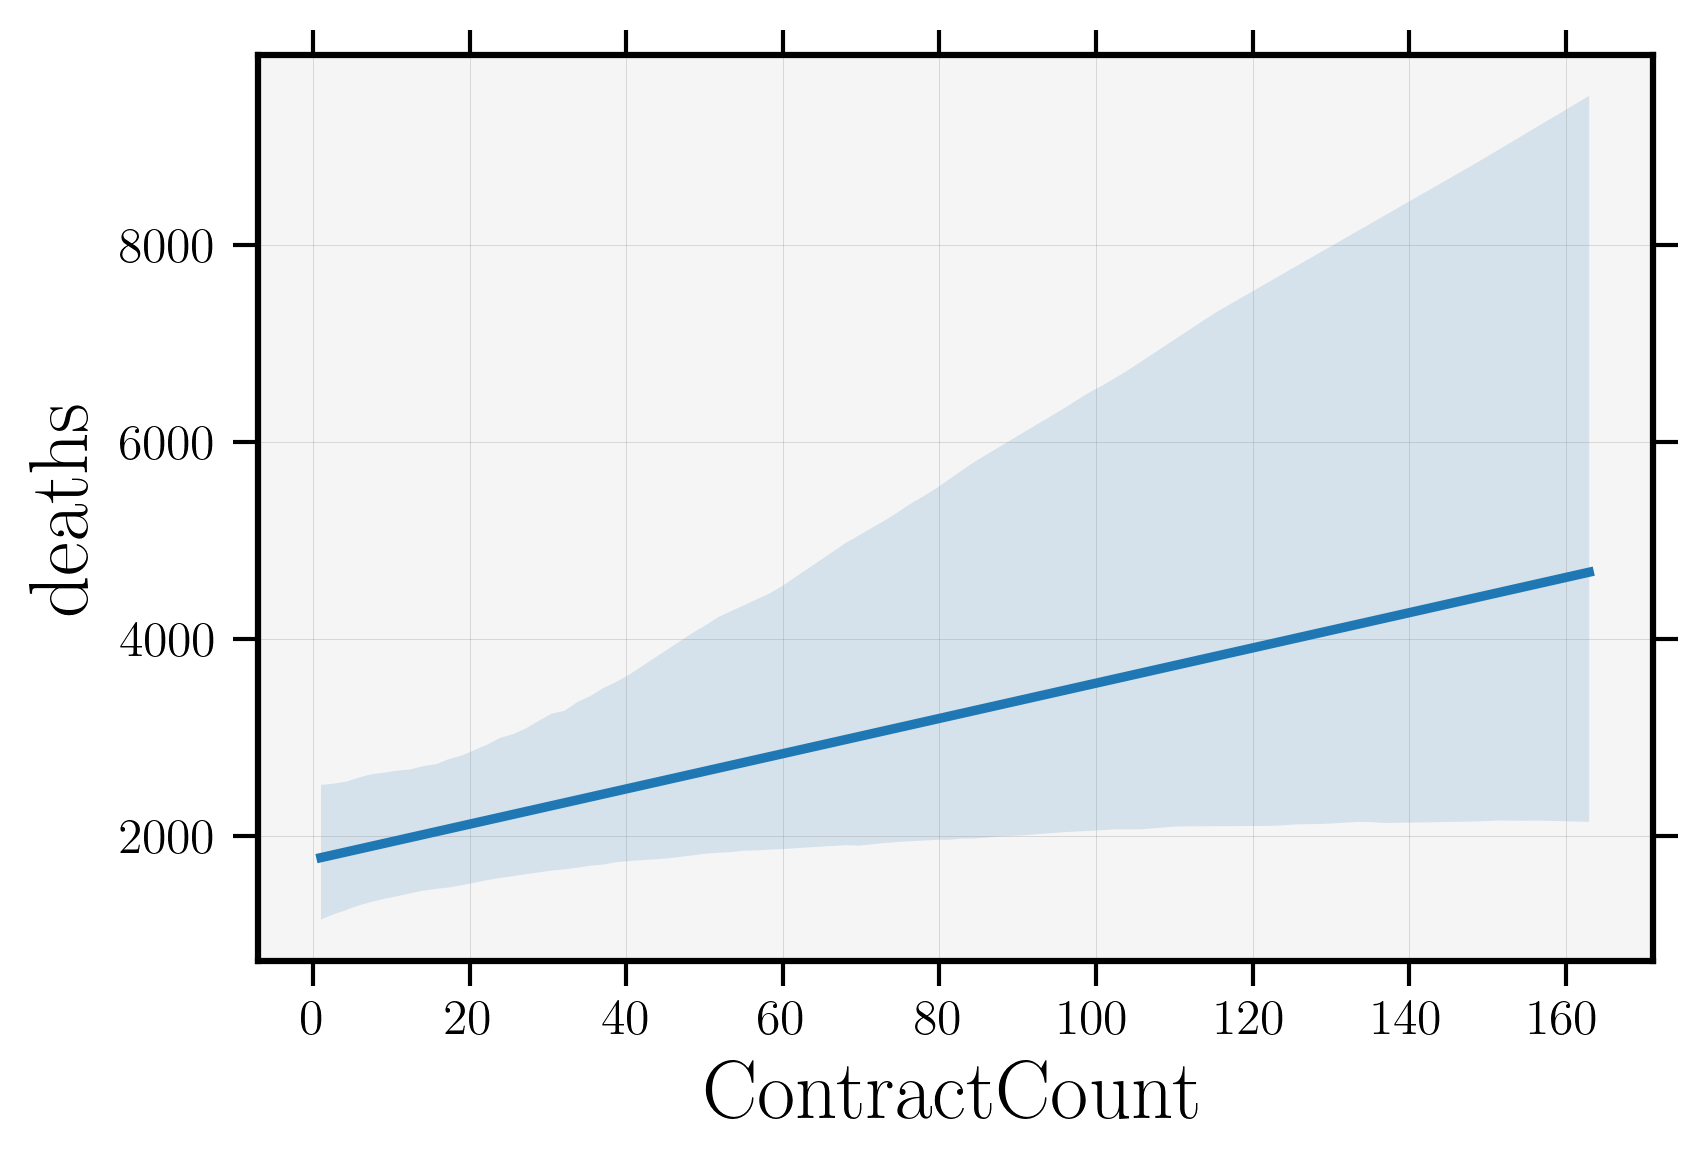

In [105]:
sns.regplot(x='ContractCount', y='deaths', data=cmad_merged.loc[cmad_merged.deaths>100], scatter=False)

<AxesSubplot:xlabel='CompanyPresence', ylabel='deaths'>

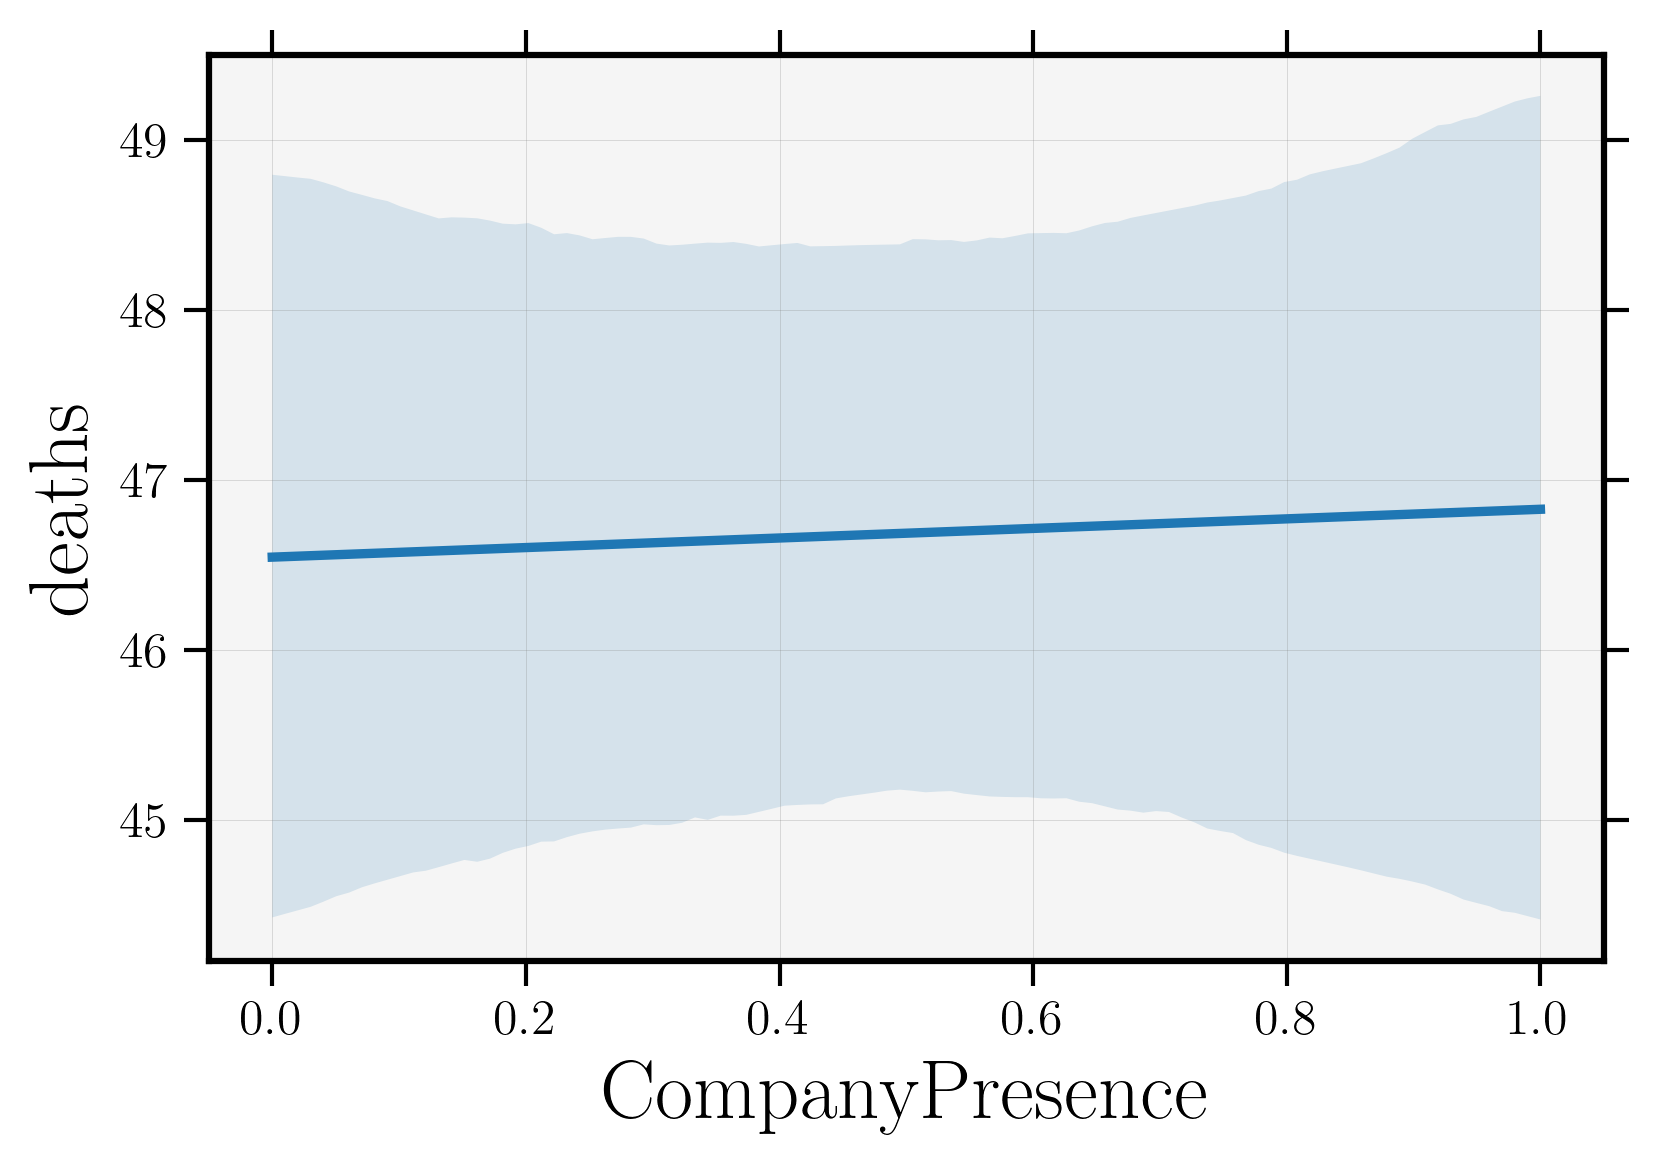

In [106]:
sns.regplot(x='CompanyPresence', y='deaths', data=cmad_merged.loc[cmad_merged.deaths<100], scatter=False)

<AxesSubplot:xlabel='CompanyPresence', ylabel='deaths'>

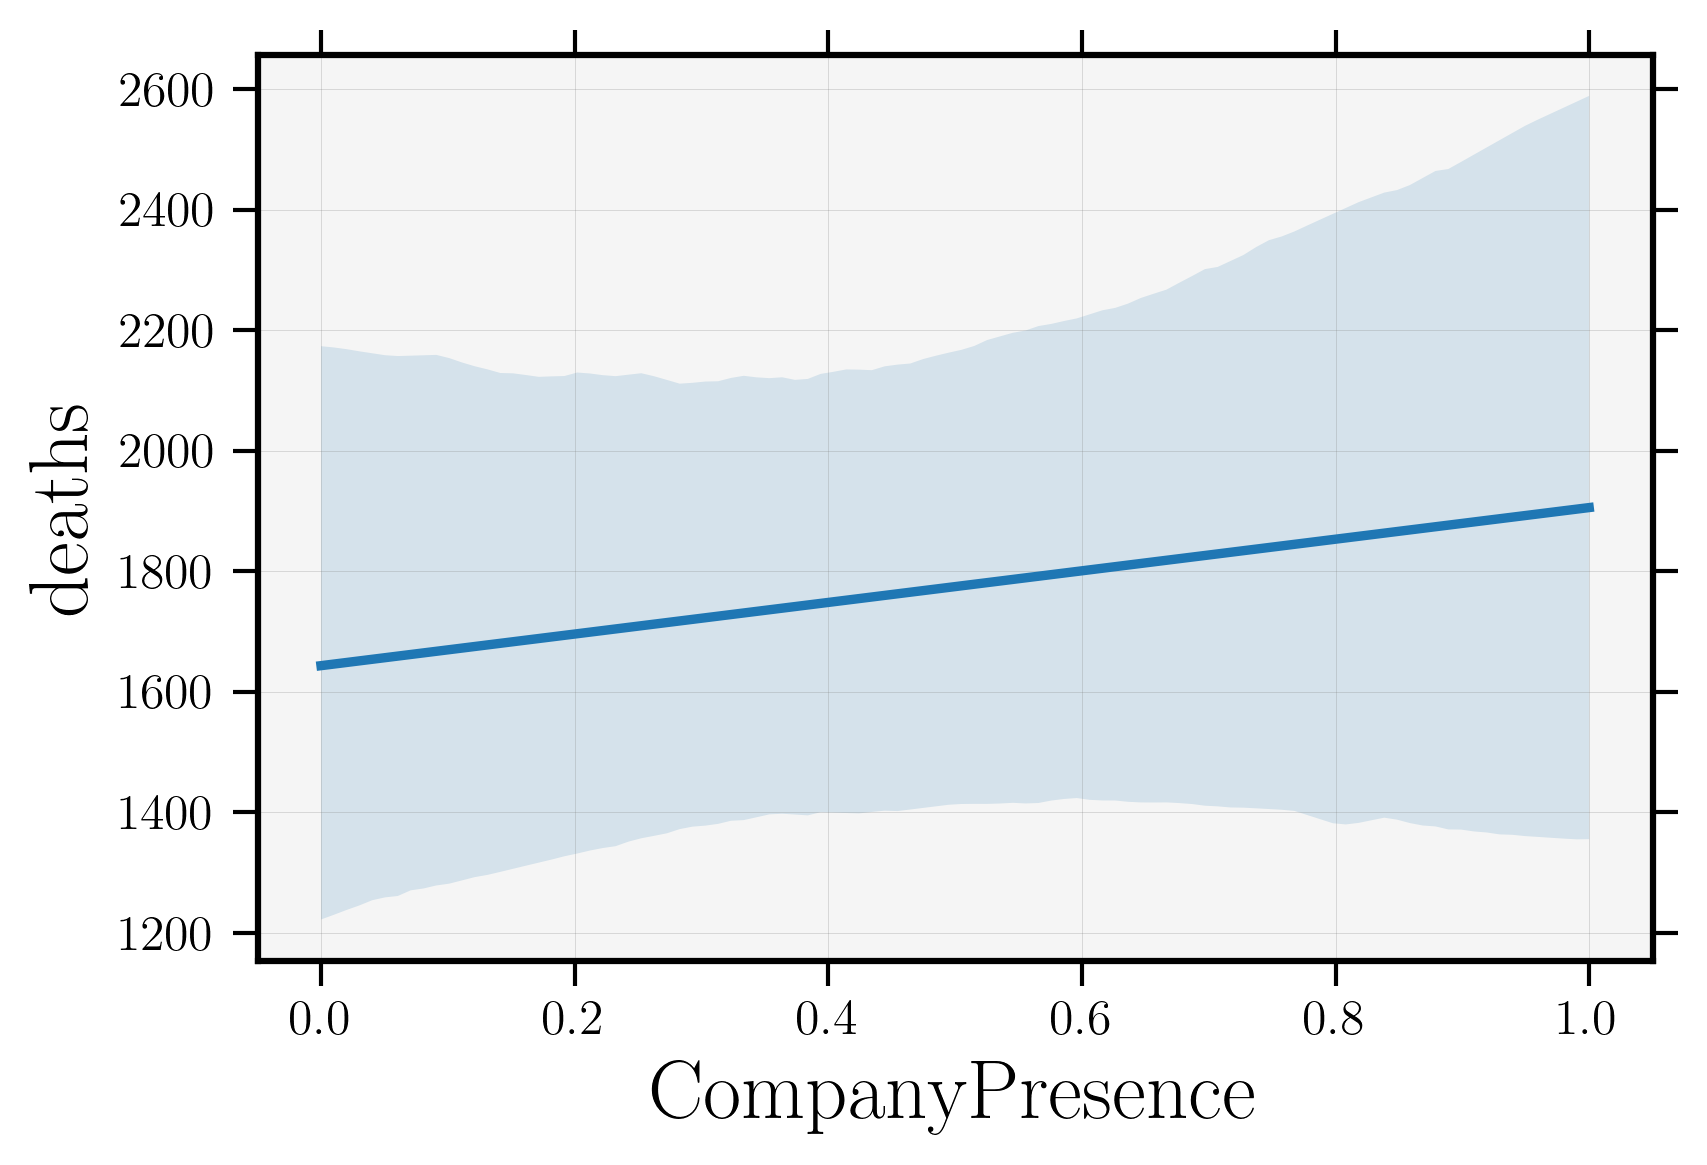

In [107]:
sns.regplot(x='CompanyPresence', y='deaths', data=cmad_merged.loc[cmad_merged.deaths>100], scatter=False)

<AxesSubplot:xlabel='year', ylabel='deaths'>

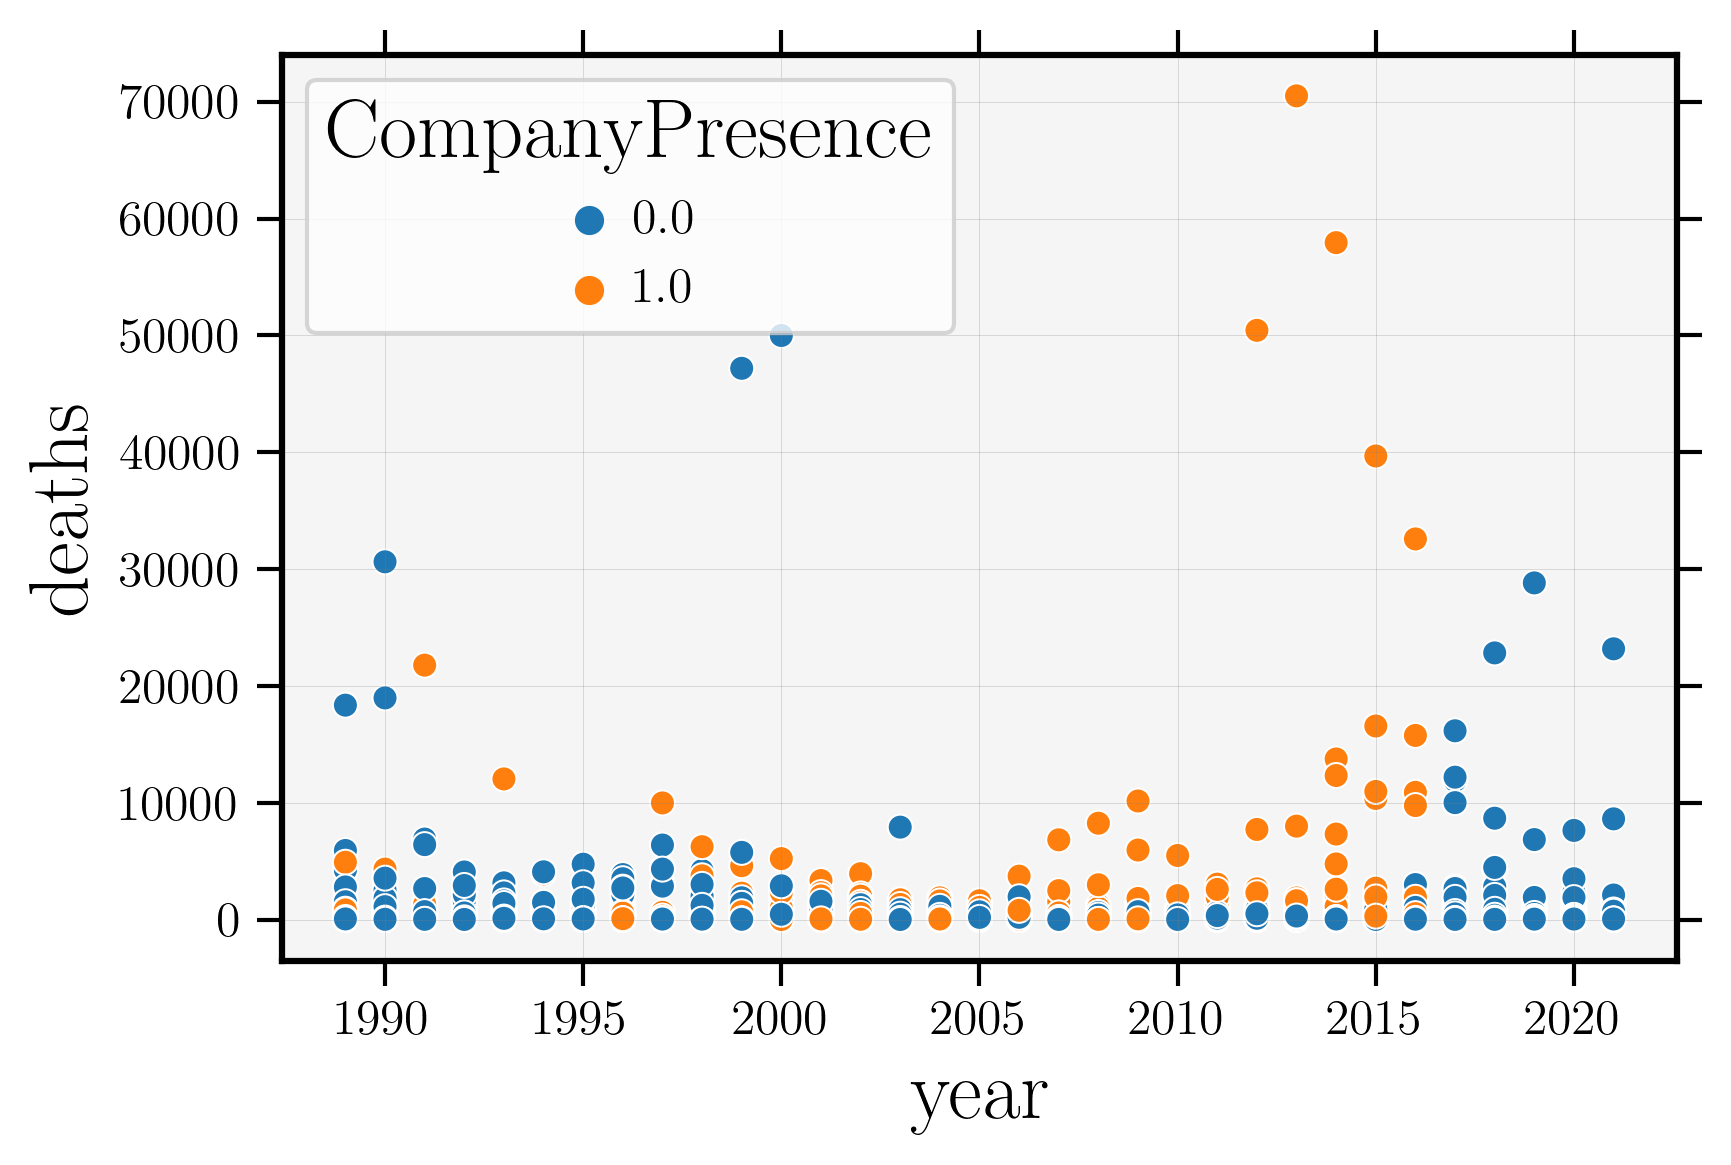

In [108]:
sns.scatterplot(x="year", y="deaths",
                hue="CompanyPresence",data=cmad_merged)

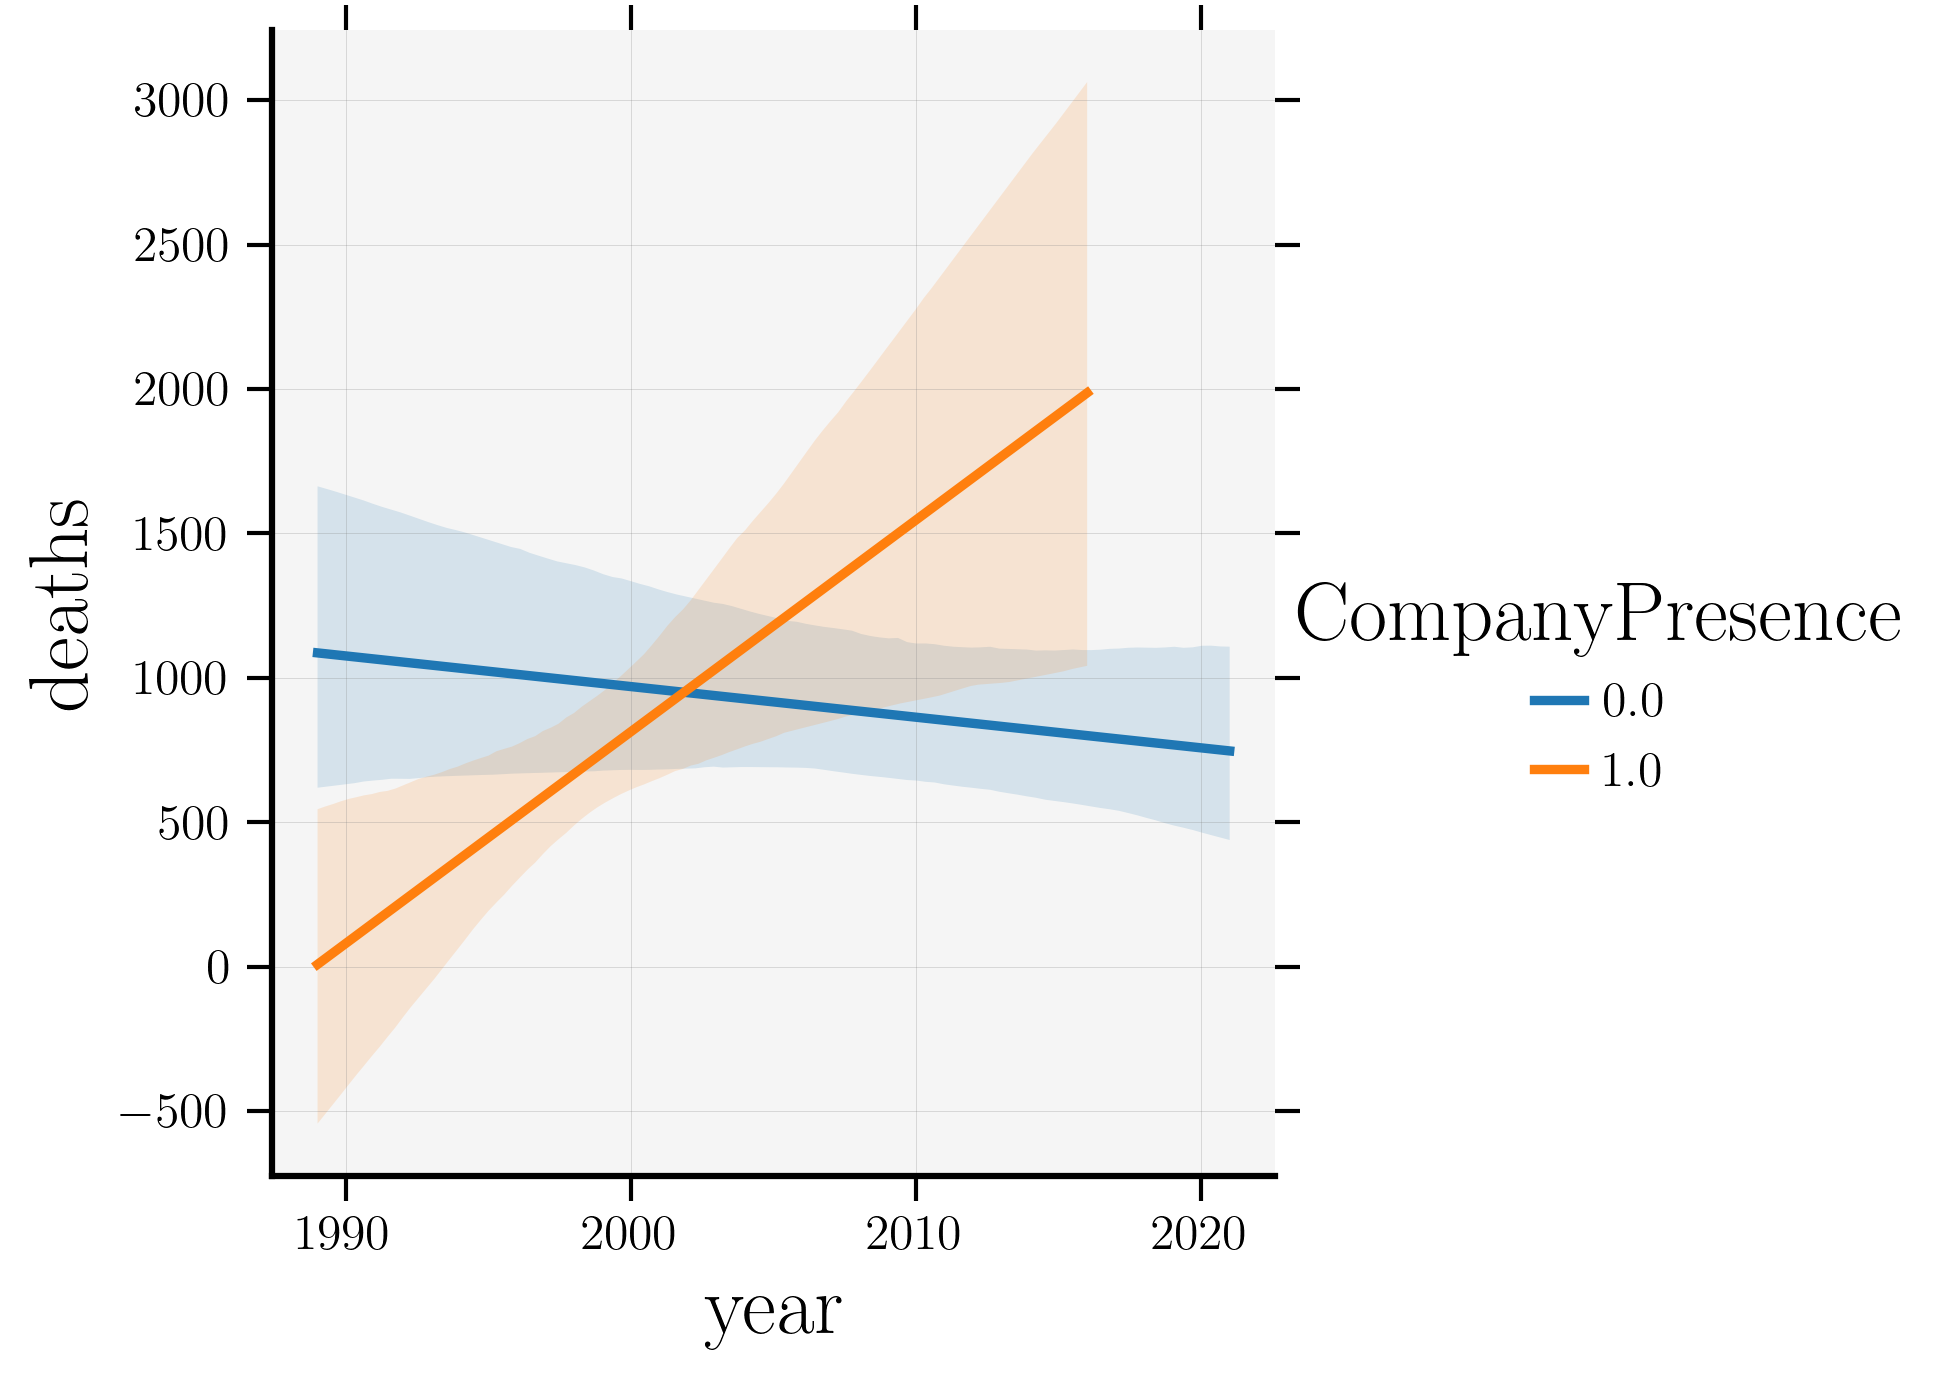

In [109]:
sns.lmplot(x="year", y="deaths",
                hue="CompanyPresence",data=cmad_merged, scatter=False)

In [110]:
cmad_merged[['CompanyPresence', 'ContractCount', 'deaths']].describe()

,CompanyPresence,ContractCount,deaths
count,1403.000000,672.000000,1403.000000
mean,0.478974,7.017857,999.490378
std,0.499736,14.301823,4229.152964
min,0.000000,1.000000,25.000000
25%,0.000000,1.000000,44.000000
50%,0.000000,3.000000,131.000000
75%,1.000000,6.000000,505.000000
max,1.000000,163.000000,70506.000000


## PSED DATA

In [ ]:
df = pd.read_csv('data/PSED 1990-2012 Feb 2019.csv', encoding='latin-1')
df.head()

from ccode_replace_python import replace_ccode_country as rcc
import pycountry

def make_country_code(x):
    return pycountry.countries.lookup(x['Country Code']).name
df['country_name'] = df.apply(make_country_code, axis=1)
df = rcc.ccode_make(df, 'country_name')

df['count'] = 1
psed_year = df.groupby(['ccode', 'Year'])['count'].sum().reset_index()
psed_year['ccode'] = psed_year['ccode'].astype(int)
psed_year['Year'] = psed_year['Year'].astype(int)
psed_year.head()

bd_deaths.gwno_a = bd_deaths.gwno_a.str.replace('900, 200, 2', '900')
bd_deaths.gwno_a = bd_deaths.gwno_a.astype(int)

bd_deaths.year = bd_deaths.year.astype(int)

merged = bd_deaths.merge(psed_year, left_on=['gwno_a', 'year'], right_on=['ccode', 'Year'], how='left')
merged


merged.bd_best = merged.bd_best.astype(int)
merged.fillna(0)[['bd_best', 'count']].plot(kind='scatter', x='bd_best', y='count')

merged.groupby('year')['bd_best'].sum().plot()


merged.sort_values('bd_best', ascending=False).head(10)